In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 경로 설정
os.chdir('drive/MyDrive/Colab Notebooks/6주차/data')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/6주차/data'

In [4]:
train_origin_pd = pd.read_csv("train.csv")
dev_origin_pd = pd.read_csv("dev.csv")
test_origin_pd = pd.read_csv("test.csv")

print(train_origin_pd.info(),end='\n\n')
print(dev_origin_pd.info(),end='\n\n')
print(test_origin_pd.info(),end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage

In [5]:
train_origin_pd.loc[8140]

,8140
id,boostcamp-sts-v1-train-8140
source,slack-rtt
sentence_1,흐익 두근두근 ㅋㅋ
sentence_2,ㅋㅋㅋㅋㅋㅋㅋㅋㅋ
label,0.8
binary-label,0.0


In [6]:
train_pd = pd.read_csv("train_after_hanspell.csv")
dev_pd = pd.read_csv("dev_after_hanspell.csv")
test_pd = pd.read_csv("test_after_hanspell.csv")
output_pd = pd.read_csv("hanspell_30_output.csv")

print(train_pd.info(),end='\n\n')
print(dev_pd.info(),end='\n\n')
print(test_pd.info(),end='\n\n')
print(output_pd.info(),end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9323 entries, 0 to 9322
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9323 non-null   object 
 1   source        9323 non-null   object 
 2   sentence_1    9323 non-null   object 
 3   sentence_2    9323 non-null   object 
 4   label         9323 non-null   float64
 5   binary-label  9323 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage

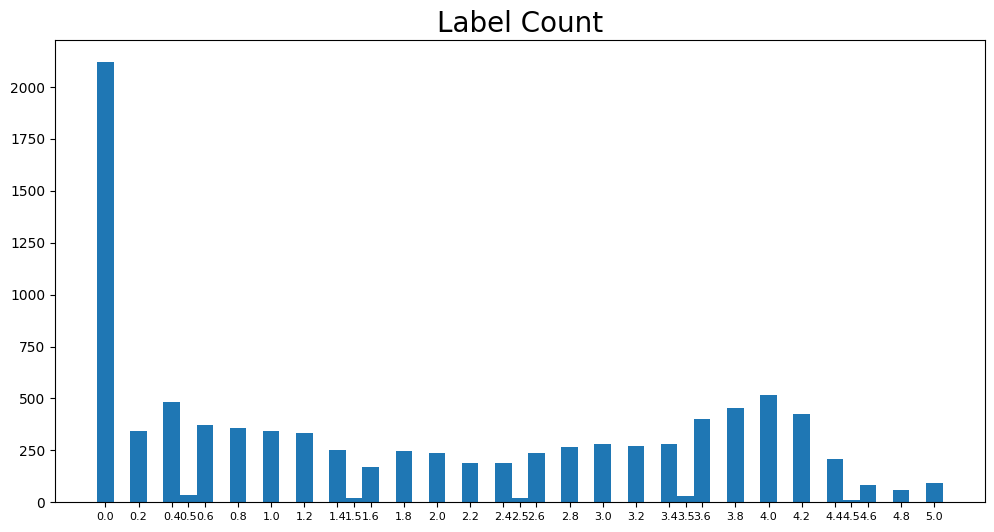

In [7]:
feature = train_pd['label']

plt.figure(figsize=(12,6))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.1)
plt.xticks(temp.keys(), fontsize=8)
plt.show()

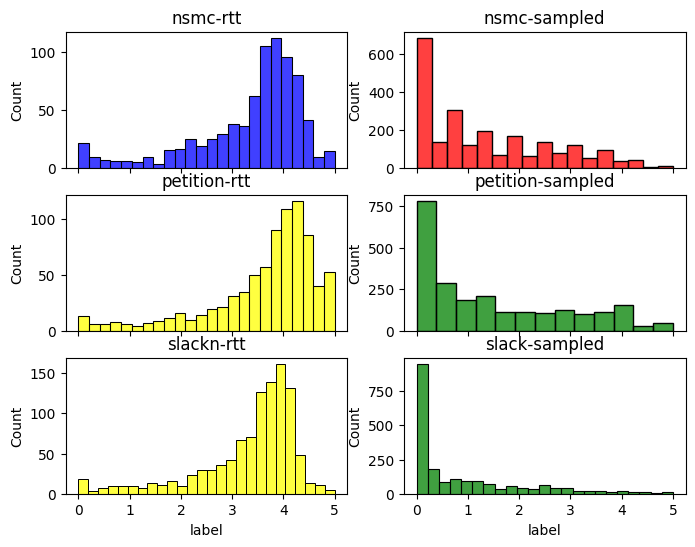

In [8]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['label'], color="blue", ax=axes[0, 0])
b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['label'], color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['label'], color="yellow", ax=axes[1, 0])
d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['label'], color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['label'], color="yellow", ax=axes[2, 0])
f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['label'], color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

# Label 0 비복원 추출 후 길이 분포 비교

In [9]:
train_except_label0 =  train_pd[train_pd['label']!=0] # label이 0이 아닌 7204 행

In [10]:
train_label0_sample = train_pd[train_pd['label']==0].sample(n=1000)  # label이 0인 행 중 1000개 추출
train_label0_remaining = train_pd[train_pd['label']==0].drop(train_label0_sample.index)  # 추출 외 나머지
train_label0_remaining

,id,source,sentence_1,sentence_2,label,binary-label
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯 뿌듯하네요,꼬옥 실제로 한번 뵈어요 뿌뿌뿌,0.0,0.0
14,boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡처한 이미지입니다,여러분들 간의 다양한 아이디어를 제안하고 나누는 채널입니다,0.0,0.0
22,boostcamp-sts-v1-train-022,slack-sampled,답답할 때 보면 속이 뻥 뚫릴 것 같아요,양보단 한입 먹는 순간 고삐 풀릴 것 같아요,0.0,0.0
23,boostcamp-sts-v1-train-023,nsmc-sampled,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요,조금 유치하지만 가볍게 볼 수는 있는 영화네요,0.0,0.0
54,boostcamp-sts-v1-train-054,petition-sampled,지금 있는 시설 관리라도 좀 잘 했으면 좋겠습니다,여성가족부 폐지하고 그 예산을 좀 더 올바르게 사용했으면 좋겠습니다,0.0,0.0
...,...,...,...,...,...,...
9206,boostcamp-sts-v1-train-9207,nsmc-sampled,따당따땅 오프닝 장면부터 작품,밀당 영화 밀당만 분,0.0,0.0
9210,boostcamp-sts-v1-train-9211,slack-sampled,다들 진심이군욬,앜포즈 출처가 저거였군욬,0.0,0.0
9249,boostcamp-sts-v1-train-9250,petition-sampled,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요,우리 각자의 인권을 찾을 수 있도록 참여해 주세요,0.0,0.0
9261,boostcamp-sts-v1-train-9262,petition-sampled,축구 경쟁력을 갖추자,국민을 살리려면 관광산업을 키워주세요,0.0,0.0


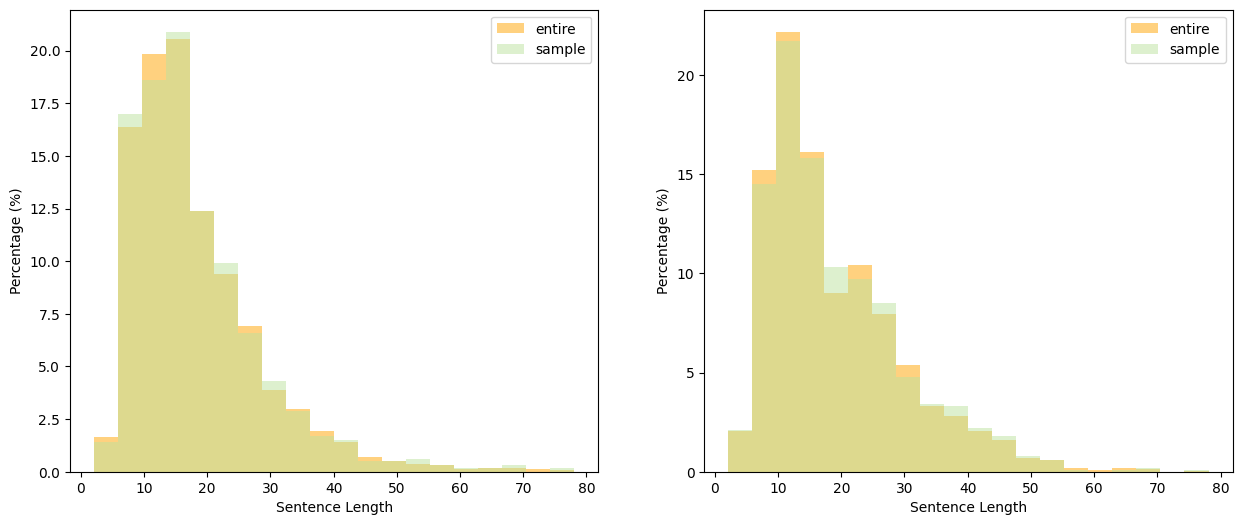

In [11]:
original1_length = train_pd[train_pd['label'] == 0]['sentence_1'].str.len()
sampled1_length = train_label0_sample['sentence_1'].str.len()
original2_length = train_pd[train_pd['label'] == 0]['sentence_2'].str.len()
sampled2_length = train_label0_sample['sentence_2'].str.len()


# 원본 데이터와 샘플링된 데이터의 문장 길이 분포 비율 계산
original1_hist, bins = np.histogram(original1_length, bins=20)
sampled1_hist, _ = np.histogram(sampled1_length, bins=bins)

original2_hist, bins = np.histogram(original2_length, bins=20)
sampled2_hist, _ = np.histogram(sampled2_length, bins=bins)

# 비율로 변환 (각 히스토그램의 빈도를 전체 개수로 나눔)
original1_hist_percent = original1_hist / original1_hist.sum() * 100
sampled1_hist_percent = sampled1_hist / sampled1_hist.sum() * 100

original2_hist_percent = original2_hist / original2_hist.sum() * 100
sampled2_hist_percent = sampled2_hist / sampled2_hist.sum() * 100

# 히스토그램 그리기
f, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

axes[0].bar(bins[:-1], original1_hist_percent, width=np.diff(bins), alpha=0.5, color='orange', label='entire')
axes[0].bar(bins[:-1], sampled1_hist_percent, width=np.diff(bins), alpha=0.5, color='#bce29e', label='sample')
axes[0].legend()

axes[0].set_xlabel('Sentence Length')
axes[0].set_ylabel('Percentage (%)')

axes[1].bar(bins[:-1], original2_hist_percent, width=np.diff(bins), alpha=0.5, color='orange', label='entire')
axes[1].bar(bins[:-1], sampled2_hist_percent, width=np.diff(bins), alpha=0.5, color='#bce29e', label='sample')
axes[1].legend()

axes[1].set_xlabel('Sentence Length')
axes[1].set_ylabel('Percentage (%)')
plt.show()

# Switching

In [12]:
switced_train_pd = train_except_label0.copy()
switced_train_pd['sentence_1'] = train_pd['sentence_2']
switced_train_pd['sentence_2'] = train_pd['sentence_1']

# 5점 데이터 추가

In [13]:
train_label5 = train_label0_remaining.sample(n=800)
train_label5 = train_label5.reset_index(drop=True)

In [14]:
# sentence_1과 sentence_2를 덮어쓰기
def swap_sentences(row):
    if row.name % 2 == 0:  # 인덱스가 짝수인 경우 (row.name은 인덱스 값)
        row['sentence_1'] = row['sentence_2']  # sentence_2 값을 sentence_1에 덮어쓰기
    else:  # 인덱스가 홀수인 경우
        row['sentence_2'] = row['sentence_1']  # sentence_1 값을 sentence_2에 덮어쓰기
    return row

def reset_label(row):
    row['label'] = 5.0
    row['binary-label'] = 1.0
    return row

# apply를 통해 각 행에 대해 swap_sentences 함수 적용
train_label5 = train_label5.apply(swap_sentences, axis=1)
train_label5 = train_label5.apply(reset_label, axis=1)
# 결과 출력
train_label5

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-1549,slack-sampled,아직 몸이 좀 쑤신데,아직 몸이 좀 쑤신데,5.0,1.0
1,boostcamp-sts-v1-train-1041,slack-sampled,와 취미들 대박,와 취미들 대박,5.0,1.0
2,boostcamp-sts-v1-train-5427,petition-sampled,김현희를 북한으로 추방해 주세요,김현희를 북한으로 추방해 주세요,5.0,1.0
3,boostcamp-sts-v1-train-1267,slack-sampled,스케줄 바로 날렸습니다,스케줄 바로 날렸습니다,5.0,1.0
4,boostcamp-sts-v1-train-6595,slack-sampled,요청받은 일을 처리했을 때 쓸 이모지를 추가했습니다,요청받은 일을 처리했을 때 쓸 이모지를 추가했습니다,5.0,1.0
...,...,...,...,...,...,...
795,boostcamp-sts-v1-train-187,slack-sampled,와아아아 안전 좋아요 오 오,와아아아 안전 좋아요 오 오,5.0,1.0
796,boostcamp-sts-v1-train-2359,petition-sampled,각급 선거관리위원회의 예산낭비를 다음과 같이 고발합니다,각급 선거관리위원회의 예산낭비를 다음과 같이 고발합니다,5.0,1.0
797,boostcamp-sts-v1-train-5850,slack-sampled,고민 중입니다,고민 중입니다,5.0,1.0
798,boostcamp-sts-v1-train-6574,petition-sampled,대통령님 고육지책이라는 운전면허시험제도를 개선해 주십시오,대통령님 고육지책이라는 운전면허시험제도를 개선해 주십시오,5.0,1.0


# Sampling과 Switching이 적용된 train

In [15]:
augmented_train = pd.concat([train_except_label0, switced_train_pd,train_label0_sample, train_label5],ignore_index = True)
augmented_train

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도 있고 반전도 있고 여느 한국 영화 쓰레기들하고는 차원이 다르네요,반전도 있고 사랑도 있고 재미도 있네요,2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근 권한이 없다고 뜹니다,오 액세스 권한이 없다고 합니다,4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해 주세요,주택청약 무주택 기준 변경해 주세요,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사 후 처음 대면으로 만나 반가웠습니다,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다,3.0,1.0
4,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스트론 이스트 팬,2.6,1.0
...,...,...,...,...,...,...
16203,boostcamp-sts-v1-train-187,slack-sampled,와아아아 안전 좋아요 오 오,와아아아 안전 좋아요 오 오,5.0,1.0
16204,boostcamp-sts-v1-train-2359,petition-sampled,각급 선거관리위원회의 예산낭비를 다음과 같이 고발합니다,각급 선거관리위원회의 예산낭비를 다음과 같이 고발합니다,5.0,1.0
16205,boostcamp-sts-v1-train-5850,slack-sampled,고민 중입니다,고민 중입니다,5.0,1.0
16206,boostcamp-sts-v1-train-6574,petition-sampled,대통령님 고육지책이라는 운전면허시험제도를 개선해 주십시오,대통령님 고육지책이라는 운전면허시험제도를 개선해 주십시오,5.0,1.0


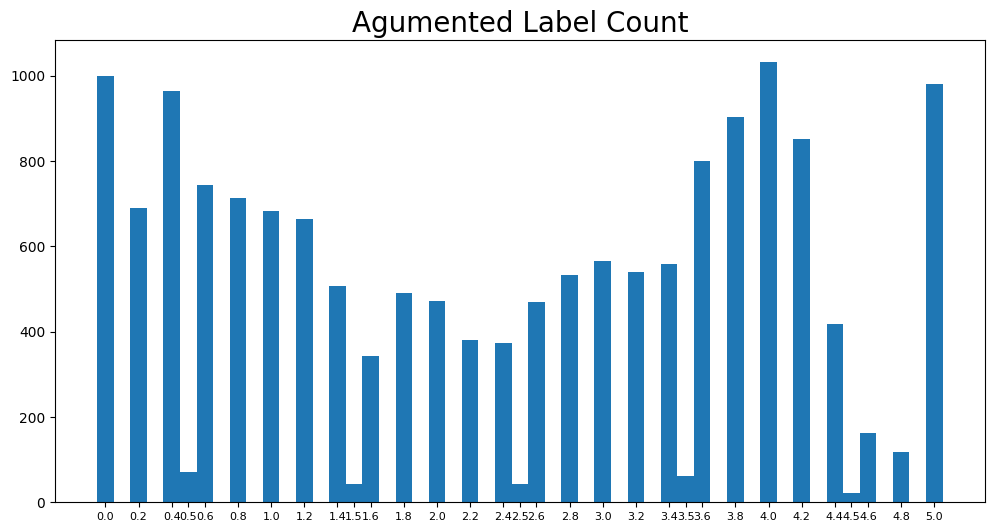

In [16]:
feature = augmented_train['label']

plt.figure(figsize=(12,6))
plt.title('Agumented Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.1)
plt.xticks(temp.keys(), fontsize=8)
plt.show()

In [17]:
def round_to_nearest_half(x):
    return round(x * 2) / 2

# 새로운 label 열 생성
augmented_train['rounded_label'] = augmented_train['label'].apply(round_to_nearest_half)


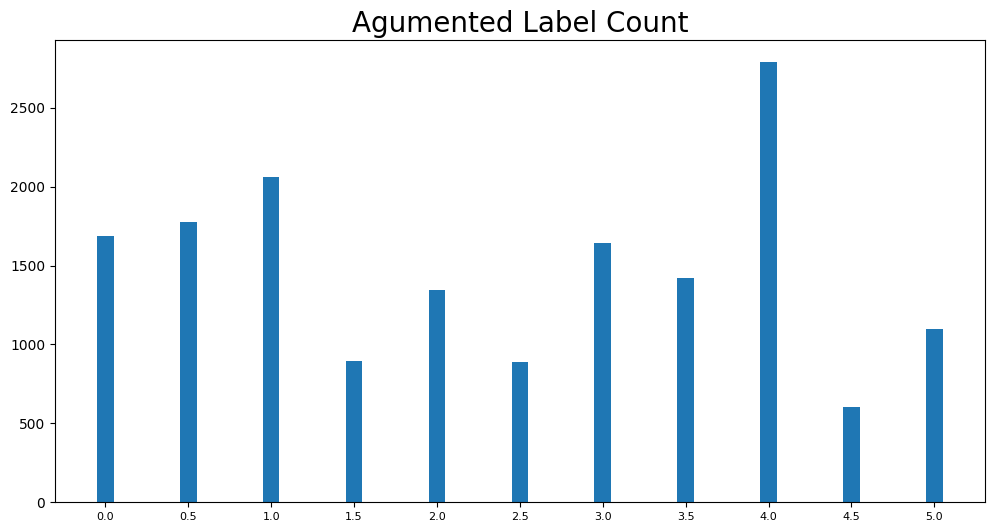

In [18]:
feature = augmented_train['rounded_label']

plt.figure(figsize=(12,6))
plt.title('Agumented Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.1)
plt.xticks(temp.keys(), fontsize=8)
plt.show()

In [19]:
augmented_train.to_csv('train_after_hanspell_aug.csv')